In [1]:
import lambeq as lq
import pennylane as pl
import numpy as np

c:\Users\henry\Desktop\MastersProject\QC_env\lib\site-packages\lambeq\text2diagram\ccg_parser.py:25: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm


# Lambeq

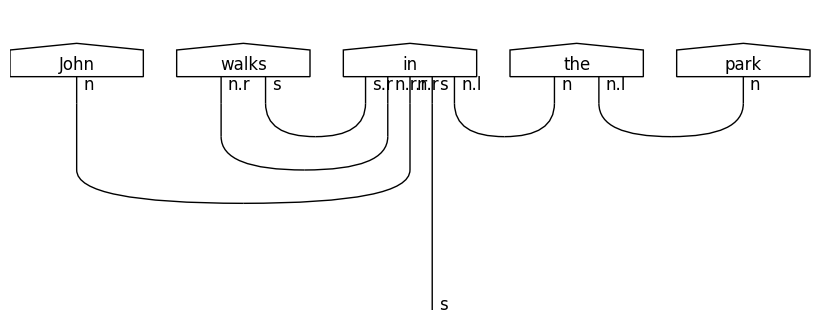

In [7]:
from lambeq import BobcatParser
from discopy import grammar

sentence = 'John walks in the park'

# Parse the sentence and convert it into a string diagram
parser = BobcatParser(verbose='suppress')
diagram = parser.sentence2diagram(sentence)

grammar.draw(diagram, figsize=(14,3), fontsize=12)

# Pennylane

In [12]:
vector = np.array([4,3]*5)
vector = vector/vector.max()
vector

array([1.  , 0.75, 1.  , 0.75, 1.  , 0.75, 1.  , 0.75, 1.  , 0.75])

## My Version

In [13]:
device = pl.device("default.qubit", wires=len(vector))

def NormalizeVector(vector):
    return vector/vector.max()

@pl.qnode(device)
def EncodeVector(vector):
    for idx, i in enumerate(vector):
        pl.Hadamard(idx)
    for idx, i in enumerate(vector):
        pl.Rot(i*2*np.pi, 0, 0, wires=idx)
    return pl.expval(pl.PauliZ(0)), pl.expval(pl.PauliZ(1)), pl.expval(pl.PauliZ(2))

circuit = pl.QNode(EncodeVector, device)

vector = NormalizeVector(np.array([0.2, 3, 9.4]))

print(pl.draw(circuit, expansion_strategy="device")(vector))

0: ──H──Rot(0.13,0.00,0.00)─┤  <Z>
1: ──H──Rot(2.01,0.00,0.00)─┤  <Z>
2: ──H──Rot(6.28,0.00,0.00)─┤  <Z>


## Pennylane Angle Encoding

In [45]:
device = pl.device("default.qubit", wires=len(vector))

@pl.qnode(device)
def PL_AngleEncode(vector):
    pl.AngleEmbedding(vector, range(3), "Z")
    pl.Hadamard(0)
    return pl.probs(wires=range(3))

circuit = pl.QNode(PL_AngleEncode, device)

vector = NormalizeVector(np.array([0.2, 3, 9.4]))

print(pl.draw(circuit, expansion_strategy="device")(vector))

0: ──RZ(0.02)──H─┤ ╭Probs
1: ──RZ(0.32)────┤ ├Probs
2: ──RZ(1.00)────┤ ╰Probs


## Pennylane Amplitude Encoding

In [88]:
device = pl.device('default.qubit', wires=3)

@pl.qnode(device)
def PL_AmplitudeEncode(vector):
    pl.AmplitudeEmbedding(features=vector, wires=range(len(vector)), pad_with=0., normalize=True)
    pl.Hadamard(0)
    return pl.expval(pl.PauliZ(0))

circuit = pl.QNode(PL_AmplitudeEncode, device)
vector = NormalizeVector(np.array([0.2, 3, 0,]))
print(pl.draw(circuit, expansion_strategy="device")(vector))
device.state

0: ─╭QubitStateVector(M0)──H─┤  <Z>
1: ─├QubitStateVector(M0)────┤     
2: ─├QubitStateVector(M0)────┤     
3: ─╰QubitStateVector(M0)────┤     


array([1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j])